In [29]:
from dataset import INBreastDataset2012
from torchvision.transforms import v2 as T
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [30]:
train_dir = r'Tensors\Imagenes_centradas\train'
test_dir = r'Tensors\Imagenes_centradas\test'

In [31]:
train_transform = T.Compose(
        [
            T.RandomRotation(degrees=35, expand=True, fill=0.0),
            T.RandomHorizontalFlip(p=0.5),
            T.RandomVerticalFlip(p=0.5),
            T.Resize(1024,1024)

        ]
    )

In [32]:
train_data = INBreastDataset2012(train_dir,transform=train_transform)
test_data = INBreastDataset2012(test_dir)

In [33]:
train_dataloader = DataLoader(train_data, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=True)

torch.Size([2, 1024, 1024])
torch.Size([2, 1024, 1024])


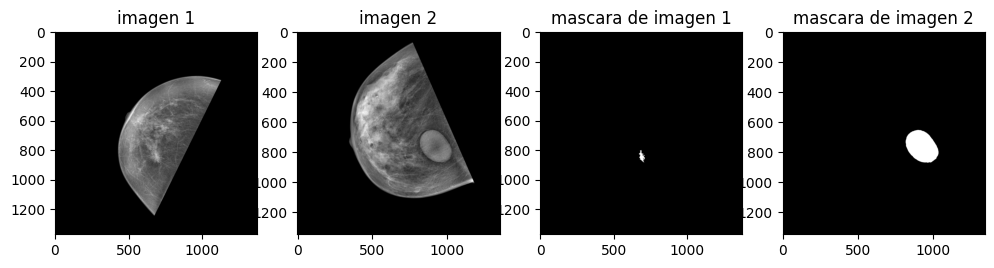

In [34]:
plt.figure(figsize=(12,12))
for i, (imagen,mascara) in enumerate(train_dataloader):
    ax = plt.subplot(2,4,i+1)
    ax.title.set_text(f'imagen {i+1}')
    plt.imshow(imagen.squeeze(), cmap='gray')
    ax = plt.subplot(2,4,i+3)
    ax.title.set_text(f'mascara de imagen {i+1}')
    plt.imshow(mascara.squeeze(), cmap='gray')
    if i == 1:
        break

torch.Size([2, 1024, 1024])
Feature batch shape: torch.Size([1, 1046, 1046])
Labels batch shape: torch.Size([1, 1046, 1046])


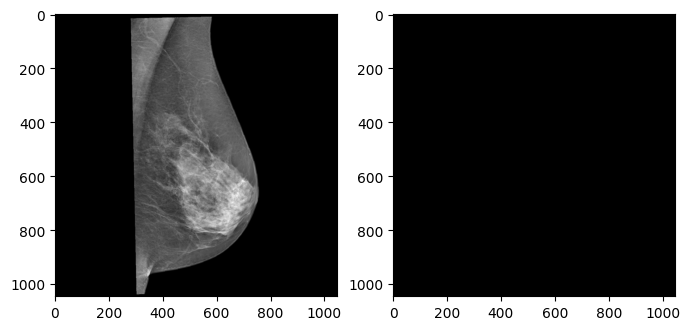

Label: tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)


In [35]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0].squeeze()
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(label, cmap='gray')
plt.show()
print(f"Label: {label}")